# 14장 모델 성능 향상시키기

## 1. 데이터의 확인과 검증셋

In [1]:
import pandas as pd

# 와인 데이터를 불러옵니다.
df = pd.read_csv("./data/wine.csv", header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로, 와인의 분류를 y로 저장합니다.
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [3]:
from sklearn.model_selection import train_test_split

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 모델을 컴파일합니다.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.2549 - loss: 34.4087 - val_accuracy: 0.2392 - val_loss: 23.8730
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2376 - loss: 20.1491 - val_accuracy: 0.2392 - val_loss: 10.5455
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2507 - loss: 8.4955 - val_accuracy: 0.2200 - val_loss: 3.3154
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2739 - loss: 2.1568 - val_accuracy: 0.7608 - val_loss: 0.5494
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7479 - loss: 0.6330 - val_accuracy: 0.7692 - val_loss: 0.6762
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7643 - loss: 0.7098 - val_accuracy: 0.8023 - val_loss: 0.5915
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8058 - loss: 0.6014 - val_accuracy: 0.8385 - val_loss: 0.4637
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8385 - loss: 0.4695 - val_accuracy: 0.8754 - val_loss: 0.3406
Ep

In [6]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print("Test accuracy:", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9437 - loss: 0.1723
Test accuracy: 0.947692334651947


## 2. 모델 업데이트하기

- 에포크(epochs)는 학습을 몇 번 반복할 것인지를 정의
    - ex> 에포크가 50이면, 순전파와 역전파를 50번 실시
    - 많이 반복한다고 해서 모델 성능이 지속적으로 좋아지지 않음
    - 최적의 학습 반복 횟수를 정하는 것이 중요

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 구조를 재설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

# 모델을 다시 컴파일합니다.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델이 저장되는 조건을 설정합니다.
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=500,
    validation_split=0.25,
    verbose=0,
    callbacks=[checkpointer],
)


Epoch 1: saving model to ./data/model/all/01-0.7738.keras

Epoch 2: saving model to ./data/model/all/02-0.8708.keras

Epoch 3: saving model to ./data/model/all/03-0.9146.keras

Epoch 4: saving model to ./data/model/all/04-0.9277.keras

Epoch 5: saving model to ./data/model/all/05-0.9315.keras

Epoch 6: saving model to ./data/model/all/06-0.9323.keras

Epoch 7: saving model to ./data/model/all/07-0.9369.keras

Epoch 8: saving model to ./data/model/all/08-0.9392.keras

Epoch 9: saving model to ./data/model/all/09-0.9385.keras

Epoch 10: saving model to ./data/model/all/10-0.9392.keras

Epoch 11: saving model to ./data/model/all/11-0.9385.keras

Epoch 12: saving model to ./data/model/all/12-0.9408.keras

Epoch 13: saving model to ./data/model/all/13-0.9431.keras

Epoch 14: saving model to ./data/model/all/14-0.9431.keras

Epoch 15: saving model to ./data/model/all/15-0.9408.keras

Epoch 16: saving model to ./data/model/all/16-0.9438.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [8]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print("Test accuracy:", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.1084
Test accuracy: 0.9653846025466919


## 3. 그래프로 과적합 확인하기

In [10]:
# 모델 구조를 재설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

# 모델을 다시 컴파일합니다.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 그래프 확인을 위한 긴 학습
history = model.fit(
    X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25
)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2477 - loss: 7.1621 - val_accuracy: 0.2392 - val_loss: 3.0524
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3229 - loss: 1.9665 - val_accuracy: 0.8285 - val_loss: 0.3176
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8155 - loss: 0.3716 - val_accuracy: 0.8208 - val_loss: 0.4296
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8138 - loss: 0.4731 - val_accuracy: 0.8369 - val_loss: 0.3833
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8364 - loss: 0.3960 - val_accuracy: 0.8831 - val_loss: 0.2605
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8823 - loss: 0.2705 - val_accuracy: 0.9277 - val_loss: 0.2352
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9195 - loss: 0.2490 - val_accuracy: 0.9323 - val_loss: 0.2068
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9246 - loss: 0.2211 - val_accuracy: 0.9385 - val_los

- `history = model.fit()`
    - `model.fit()`은 매 에포크마다 결과를 출력
        - 일반적으로 `loss`를 출력
        - `model.compile()`에서 설정한 metrics를 함께 출력
        - `loss`는 예측 값과 실제 값의 차이(=오차)
        - `accuracy`는 전체 샘플 중 정답을 맞춘 샘플의 비율(=정확도)
        - 검증셋을 지정하면 검증셋에 대한 결과를 함께 출력(`val_loss`, `val_accuracy`)
    - `history.params`에는 설정 값 저장
    - `history.epoch`에는 에포크 정보 저장
    - `history.history`에는 결과 저장

In [12]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df = pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.248653,6.094316,0.239231,3.052434
1,0.462150,1.333164,0.828462,0.317626
2,0.817809,0.394975,0.820769,0.429617
3,0.821658,0.460297,0.836923,0.383318
4,0.846805,0.364082,0.883077,0.260517
...,...,...,...,...
1995,0.994611,0.018985,0.986923,0.064239
1996,0.995124,0.018621,0.988462,0.064582
1997,0.994098,0.018975,0.988462,0.064826
1998,0.995638,0.019251,0.988462,0.062903


In [13]:
# y_vloss에 검증셋의 오차를 저장합니다.
y_vloss = hist_df["val_loss"]

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist_df["loss"]

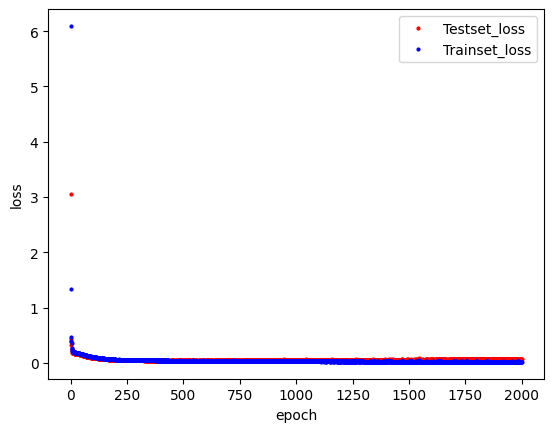

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# x 값을 지정하고 검증셋의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

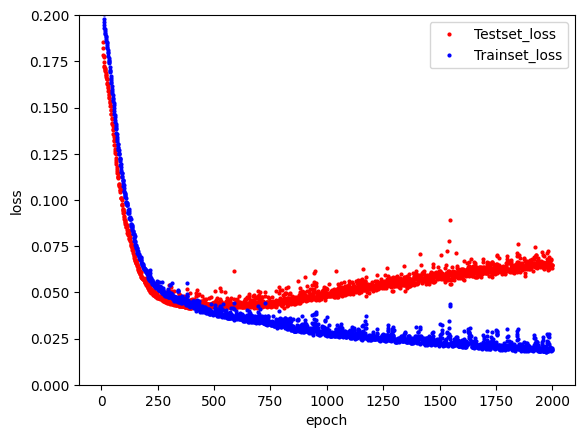

In [16]:
# y축 범위를 0 ~ 0.2로 설정
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim([0, 0.2])
plt.show()

- 학습이 오래 진행될수록 학습셋의 오차는 줄어들지만 검증셋의 오차는 다시 커짐
    - 과도학 학습으로 인한 과적합

## 4. 학습의 자동 중단

In [17]:
# 모델 구조를 재설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

# 모델을 다시 컴파일합니다.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# 학습이 언제 자동 중단될지 설정합니다.
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=20)

# 최적화 모델이 저장될 폴더와 모델 이름을 정합니다.
modelpath = "./data/model/Ch14-4-bestmodel.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor="val_loss", verbose=0, save_best_only=True
)

# 모델을 실행합니다.
history = model.fit(
    X_train,
    y_train,
    epochs=2000,
    batch_size=500,
    validation_split=0.25,
    verbose=1,
    callbacks=[early_stopping_callback, checkpointer],
)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2497 - loss: 8.1048 - val_accuracy: 0.2392 - val_loss: 4.9539
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2521 - loss: 3.9138 - val_accuracy: 0.2400 - val_loss: 1.1090
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4947 - loss: 0.7548 - val_accuracy: 0.7608 - val_loss: 0.4032
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7558 - loss: 0.4532 - val_accuracy: 0.7615 - val_loss: 0.4951
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7533 - loss: 0.5298 - val_accuracy: 0.7715 - val_loss: 0.4834
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7746 - loss: 0.5015 - val_accuracy: 0.7985 - val_loss: 0.4151
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8024 - loss: 0.4164 - val_accuracy: 0.8277 - val_loss: 0.3424
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8359 - loss: 0.3438 - val_accuracy: 0.8685 - val_

In [19]:
score = model.evaluate(X_test, y_test)
print("Test accuracy:", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.0568
Test accuracy: 0.983846127986908
